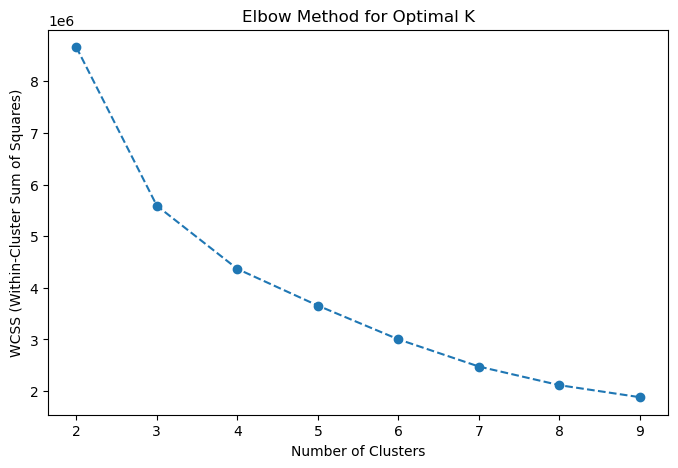

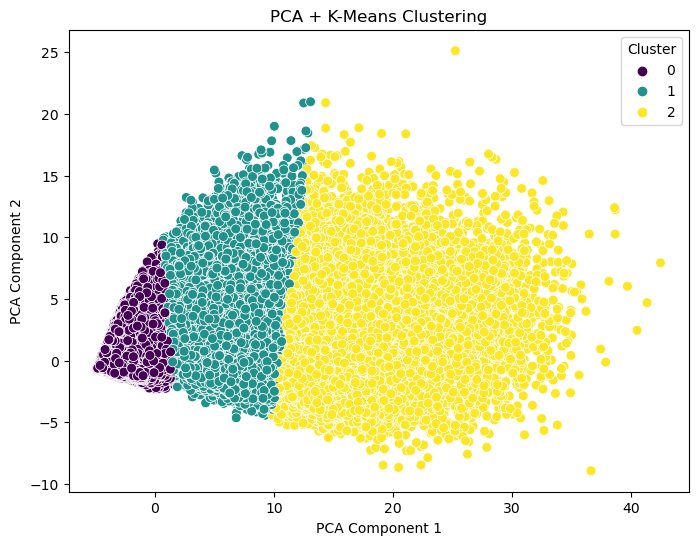

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load dataset
file_path = "main.csv"  # Update with your actual file path
df = pd.read_csv(file_path)

# Drop non-numeric columns (e.g., customer_id)
df_numeric = df.select_dtypes(include=[np.number])

# Handle missing values (fill with median)
df_numeric.fillna(df_numeric.median(), inplace=True)

# Standardize data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Apply PCA (reduce to 2 components for visualization)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Find optimal number of clusters using the Elbow Method
wcss = []
for k in range(2, 10):  # Try different cluster numbers
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.show()

# Select the optimal number of clusters (change based on elbow plot)
optimal_k = 3  # Adjust this based on the plot

# Apply K-Means with the optimal cluster number
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_numeric['Cluster'] = kmeans.fit_predict(df_pca)



# Visualize Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df_numeric['Cluster'], palette="viridis", s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA + K-Means Clustering')
plt.legend(title='Cluster')
plt.show()

# Save clustered data
df_numeric.to_csv("clustered_customers.csv", index=False)

In [5]:
import pandas as pd

# Load main dataset
df = pd.read_csv("main.csv")

# Load train and test labels
train_labels = pd.read_csv("train_cxid.csv")  # Contains Employee ID and Churn
test_labels = pd.read_csv("test_cxid.csv")    # Contains Employee ID and Churn

# Merge train and test labels with the main dataset on Employee ID
train_df = train_labels.merge(df, on="customer_id", how="left")
test_df = test_labels.merge(df, on="customer_id", how="left")

# Check for missing values after merging
print("Missing values in Train Data:", train_df.isnull().sum())
print("Missing values in Test Data:", test_df.isnull().sum())

# Drop rows with missing values (optional, or fill with meaningful data)
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

# Encoding categorical variables (same process as before)
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
categorical_cols = df.select_dtypes(include=['object']).columns.difference(['customer_id'])
for col in categorical_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    test_df[col] = le.transform(test_df[col])
    label_encoders[col] = le

# Splitting into features and target
X_train = train_df.drop(columns=['customer_id', 'churn'])  # Drop unnecessary columns
y_train = train_df['churn']

X_test = test_df.drop(columns=['customer_id', 'churn'])
y_test = test_df['churn']

# Standardizing numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

# Train Logistic Regression with Regularization
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

log_reg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', max_iter=500)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Missing values in Train Data: customer_id    0
churn          0
usage_type     0
Day_1          0
Day_2          0
              ..
Day_86         0
Day_87         0
Day_88         0
Day_89         0
Day_90         0
Length: 93, dtype: int64
Missing values in Test Data: customer_id    0
churn          0
usage_type     0
Day_1          0
Day_2          0
              ..
Day_86         0
Day_87         0
Day_88         0
Day_89         0
Day_90         0
Length: 93, dtype: int64
Logistic Regression Accuracy: 0.79
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.96      0.88    120276
           1       0.61      0.23      0.34     35736

    accuracy                           0.79    156012
   macro avg       0.71      0.60      0.61    156012
weighted avg       0.76      0.79      0.75    156012

Confusion Matrix:
 [[114958   5318]
 [ 27355   8381]]
